In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('used_cars_dataset.csv')

# Display first few rows
print(df.head())

                       name  year  km_driven    fuel seller_type transmission  \
0             Maruti 800 AC  2007      70000  Petrol  Individual       Manual   
1  Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual       Manual   
2      Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual       Manual   
3    Datsun RediGO T Option  2017      46000  Petrol  Individual       Manual   
4     Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual       Manual   

          owner  selling_price  
0   First Owner          60000  
1   First Owner         135000  
2   First Owner         600000  
3   First Owner         250000  
4  Second Owner         450000  


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or handle them differently)
df = df.dropna()

# Choose features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except last (assuming the last column is price)
y = df.iloc[:, -1]   # Last column (selling price)

# Handle categorical data if present
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict selling price
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64
R² Score: 0.6011
Mean Squared Error: 121717437744.0959


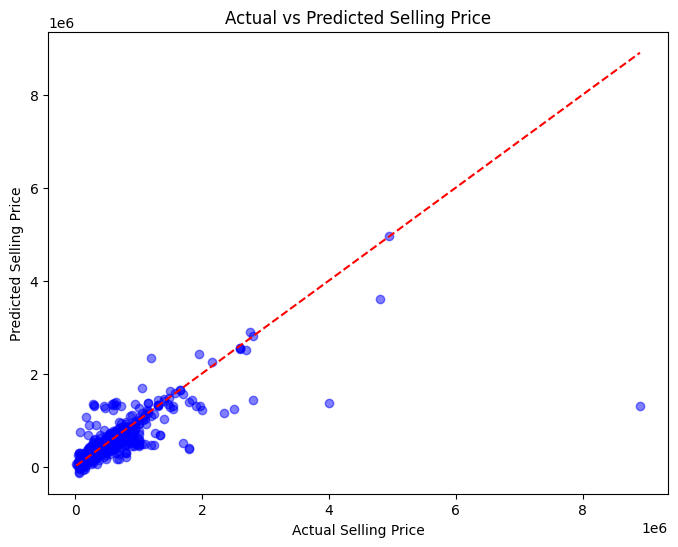

In [6]:
# Plot Actual vs Predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()